<a href="https://colab.research.google.com/github/Bharathlax-2005/Cognifyz-Internship/blob/main/Cognifyz_Technologies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cognifyz Technologies**

# **LEVEL --> 1**

## **Task 1: Data Exploration and Preprocessing**

Explore the dataset and identify the number
of rows and columns.

Check for missing values in each column and
handle them accordingly.

Perform data type conversion if necessary.
Analyze the distribution of the target variable
("Aggregate rating") and identify any class
imbalances.

In [1]:
import pandas as pd

df = pd.read_csv('/content/Dataset .csv')

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

target_distribution = df['Aggregate rating'].value_counts(normalize=True)
print("\nDistribution of the target variable (Aggregate rating):")
print(target_distribution)


Number of rows: 9551
Number of columns: 21

Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Distribution of the target variable (Aggregate rating):
Aggregate rating
0.0    0.224898
3.2    0.054654
3.1    0.054340
3.4    0.052141
3.3    0.050571
3.5    0.050257
3.0    0.049000
3.6    0.047953
3.7    0.044707
3.8    0.041880
2.9    0.039891
3.9    0.035075
2.8    0.032981
4.1    0.028688
4.0    0.027850
2.7    0.026175
4.2    0.023139
2.6    0.019998
4.3 

## **Task 2: Descriptive Analysis**

Calculate basic statistical measures (mean,
median, standard deviation, etc.) for numerical
columns.

Explore the distribution of categorical
variables like "Country Code," "City," and "Cuisines."

Identify the top cuisines and cities with the
highest number of restaurants.

In [3]:
import pandas as pd

df = pd.read_csv('/content/Dataset .csv')
numerical_stats = df.describe()
print("Basic Statistical Measures for Numerical Columns:")
print(numerical_stats)

categorical_variables = ['Country Code', 'City', 'Cuisines']

for col in categorical_variables:
    print("\n\nDistribution of", col)
    print(df[col].value_counts())

top_cuisines = df['Cuisines'].value_counts().head(10)
print("\nTop 10 Cuisines:")
print(top_cuisines)

top_cities = df['City'].value_counts().head(10)
print("\nTop 10 Cities with the Highest Number of Restaurants:")
print(top_cities)


Basic Statistical Measures for Numerical Columns:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000 

## **Task 3: Geospatial Analysis**

Visualize the locations of restaurants on a
map using latitude and longitude
information.

Analyze the distribution of restaurants
across different cities or countries.
Determine if there is any correlation
between the restaurant's location and its
rating.


Distribution of Restaurants Across Different Cities:
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

Distribution of Restaurants Across Different Countries:
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

Correlation between Latitude, Longitude, and Aggregate rating:
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


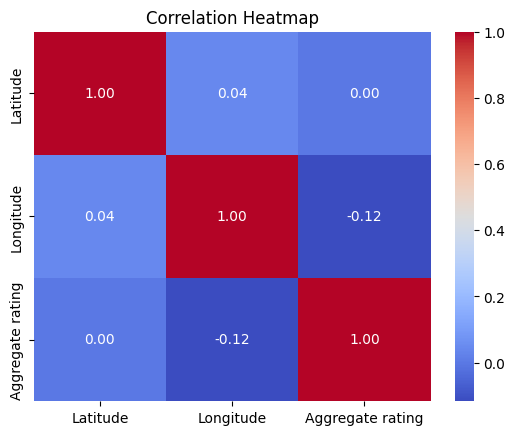

In [4]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Dataset .csv')

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=10)

marker_cluster = MarkerCluster().add_to(map)

for idx, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(marker_cluster)

map.save('restaurants_map.html')

city_distribution = df['City'].value_counts()
country_distribution = df['Country Code'].value_counts()

print("\nDistribution of Restaurants Across Different Cities:")
print(city_distribution)

print("\nDistribution of Restaurants Across Different Countries:")
print(country_distribution)

correlation = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("\nCorrelation between Latitude, Longitude, and Aggregate rating:")
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# **LEVEL --> 2**

## **Task 1: Table Booking and Online Delivery**

Determine the percentage of restaurants that
offer table booking and online delivery.

Compare the average ratings of restaurants
with table booking and those without.

Analyze the availability of online delivery
among restaurants with different price ranges.

In [5]:
import pandas as pd

df = pd.read_csv('/content/Dataset .csv')

total_restaurants = len(df)
table_booking_count = df['Has Table booking'].value_counts().get('Yes', 0)
online_delivery_count = df['Has Online delivery'].value_counts().get('Yes', 0)

percentage_table_booking = (table_booking_count / total_restaurants) * 100
percentage_online_delivery = (online_delivery_count / total_restaurants) * 100

print("Percentage of restaurants that offer table booking: {:.2f}%".format(percentage_table_booking))
print("Percentage of restaurants that offer online delivery: {:.2f}%".format(percentage_online_delivery))

average_rating_with_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
average_rating_without_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print("\nAverage rating of restaurants with table booking: {:.2f}".format(average_rating_with_booking))
print("Average rating of restaurants without table booking: {:.2f}".format(average_rating_without_booking))

price_ranges = [(0, 10), (11, 20), (21, 30), (31, 50), (51, 100)]

for price_range in price_ranges:
    min_price, max_price = price_range
    restaurants_in_range = df[(df['Average Cost for two'] >= min_price) & (df['Average Cost for two'] <= max_price)]
    online_delivery_percentage = (restaurants_in_range['Has Online delivery'].value_counts().get('Yes', 0) / len(restaurants_in_range)) * 100
    print("\nPrice Range: ${}-{}".format(min_price, max_price))
    print("Percentage of restaurants with online delivery: {:.2f}%".format(online_delivery_percentage))


Percentage of restaurants that offer table booking: 12.12%
Percentage of restaurants that offer online delivery: 25.66%

Average rating of restaurants with table booking: 3.44
Average rating of restaurants without table booking: 2.56

Price Range: $0-10
Percentage of restaurants with online delivery: 0.00%

Price Range: $11-20
Percentage of restaurants with online delivery: 0.00%

Price Range: $21-30
Percentage of restaurants with online delivery: 0.00%

Price Range: $31-50
Percentage of restaurants with online delivery: 1.01%

Price Range: $51-100
Percentage of restaurants with online delivery: 4.57%


## **Task 2: Price Range Analysis**

Determine the most common price range
among all the restaurants.

Calculate the average rating for each price
range.
Identify the color that represents the highest
average rating among different price ranges.

Most common price range among all restaurants: 1

Average rating for each price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

Color representing the highest average rating among different price ranges: 4


<ipython-input-6-449c7e15893e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_by_price_range.index, y=average_rating_by_price_range.values, palette='viridis')


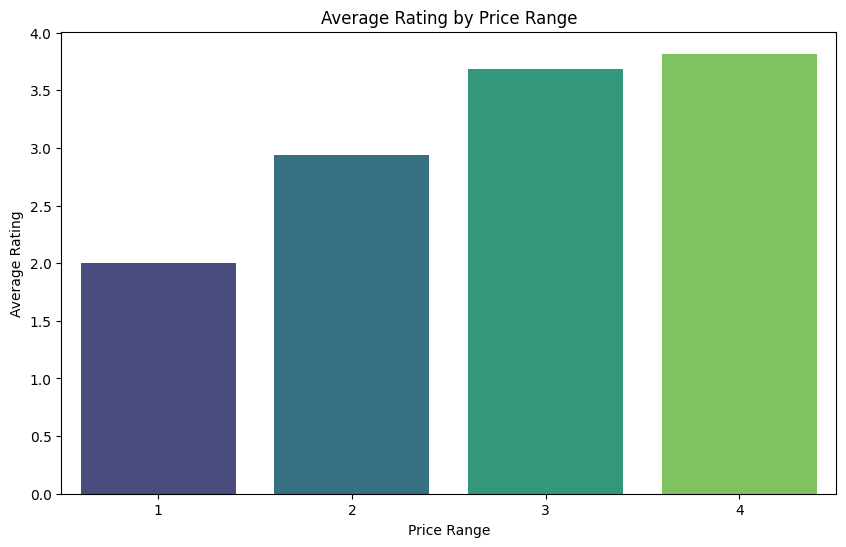

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Dataset .csv')

most_common_price_range = df['Price range'].mode()[0]
print("Most common price range among all restaurants:", most_common_price_range)

average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print("\nAverage rating for each price range:")
print(average_rating_by_price_range)

highest_avg_rating_color = average_rating_by_price_range.idxmax()
print("\nColor representing the highest average rating among different price ranges:", highest_avg_rating_color)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_by_price_range.index, y=average_rating_by_price_range.values, palette='viridis')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()


## **Task 3: Feature Engineering**

Extract additional features from the existing
columns, such as the length of the restaurant
name or address.

Create new features like "Has Table Booking"
or "Has Online Delivery" by encoding
categorical variables.

In [9]:
import pandas as pd

df = pd.read_csv('/content/Dataset .csv')

df['Restaurant Name Length'] = df['Restaurant Name'].apply(lambda x: len(str(x)))
df['Address Length'] = df['Address'].apply(lambda x: len(str(x)))

df['Has Table Booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

print(df.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

# **LEVEL --> 3**

## **Task 1: Predictive Modeling**

Build a regression model to predict the
aggregate rating of a restaurant based on
available features.
Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics.

Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv('/content/Dataset .csv')

features = ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']  # Using provided column names
target = 'Aggregate rating'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)

linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

lr_predictions = linear_regression.predict(X_test)
dt_predictions = decision_tree.predict(X_test)
rf_predictions = random_forest.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print("Metrics for {}:".format(model_name))
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print()

evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, dt_predictions, "Decision Tree")
evaluate_model(y_test, rf_predictions, "Random Forest")


Metrics for Linear Regression:
Mean Squared Error: 1.746897139494333
Mean Absolute Error: 1.101829792344461
R-squared: 0.23250725385658866

Metrics for Decision Tree:
Mean Squared Error: 0.19538199895342753
Mean Absolute Error: 0.2828885400313972
R-squared: 0.9141596471059756

Metrics for Random Forest:
Mean Squared Error: 0.09713319121039013
Mean Absolute Error: 0.20501007326007328
R-squared: 0.9573248945353962



## **Task 2: Customer Preference Analysis**

Analyze the relationship between the type of
cuisine and the restaurant's rating.

Identify the most popular cuisines among
customers based on the number of votes.

Determine if there are any specific cuisines
that tend to receive higher ratings.

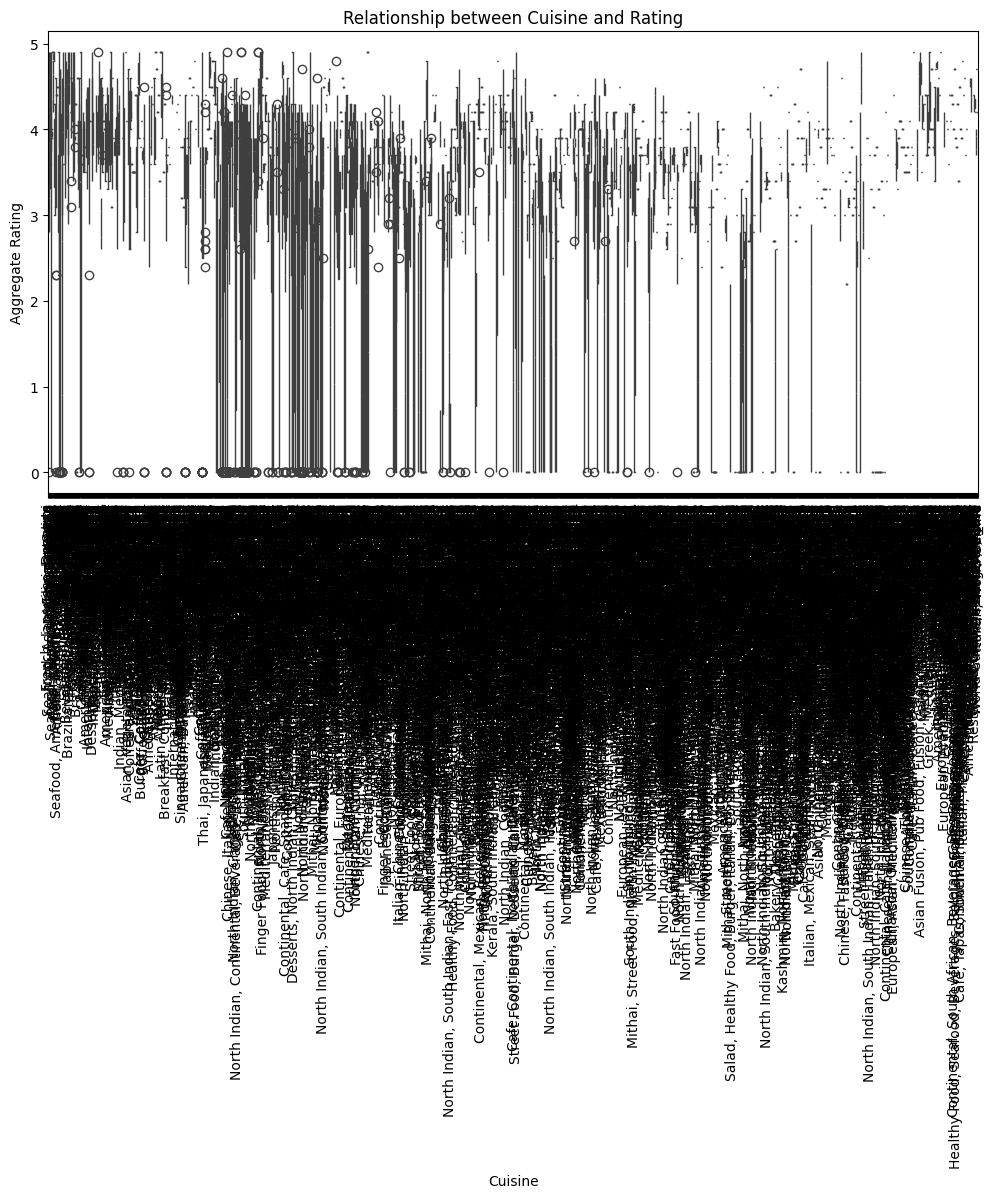


Top 10 Most Popular Cuisines based on Number of Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64

Average Rating by Cuisine:
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Dataset .csv')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df)
plt.title('Relationship between Cuisine and Rating')
plt.xlabel('Cuisine')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

popular_cuisines = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Most Popular Cuisines based on Number of Votes:")
print(popular_cuisines)

average_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Cuisine:")
print(average_rating_by_cuisine.head(10))


## **Task 3: Data Visualization**

Create visualizations to represent the distribution
of ratings using different charts (histogram, bar
plot, etc.).

Compare the average ratings of different cuisines
or cities using appropriate visualizations.

Visualize the relationship between various
features and the target variable to gain insights.

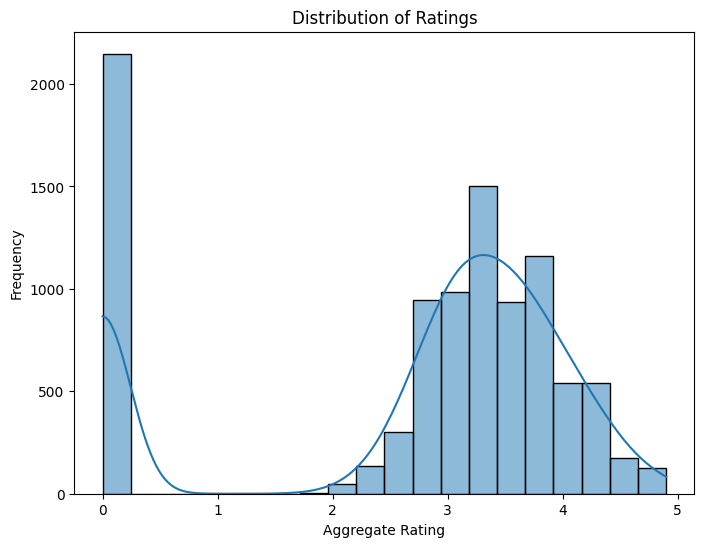

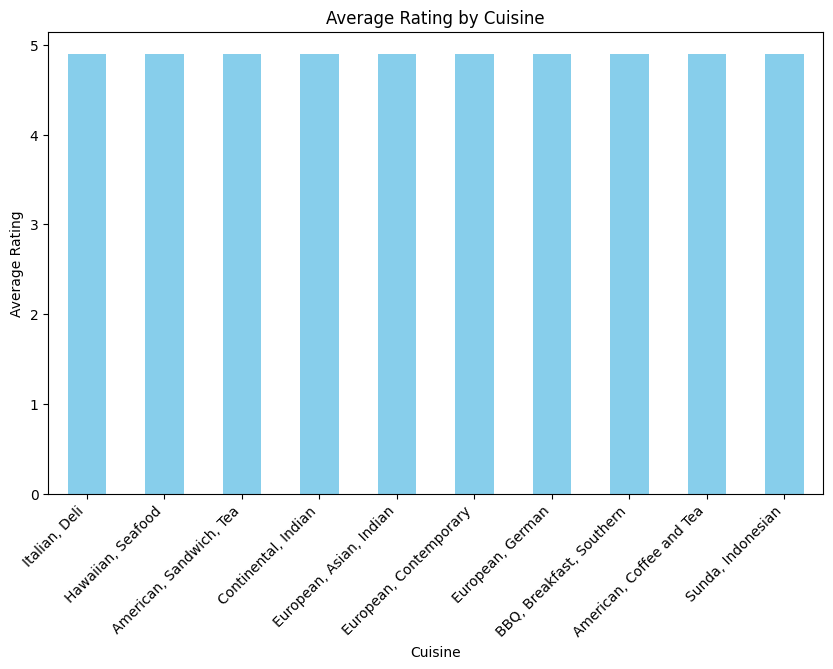

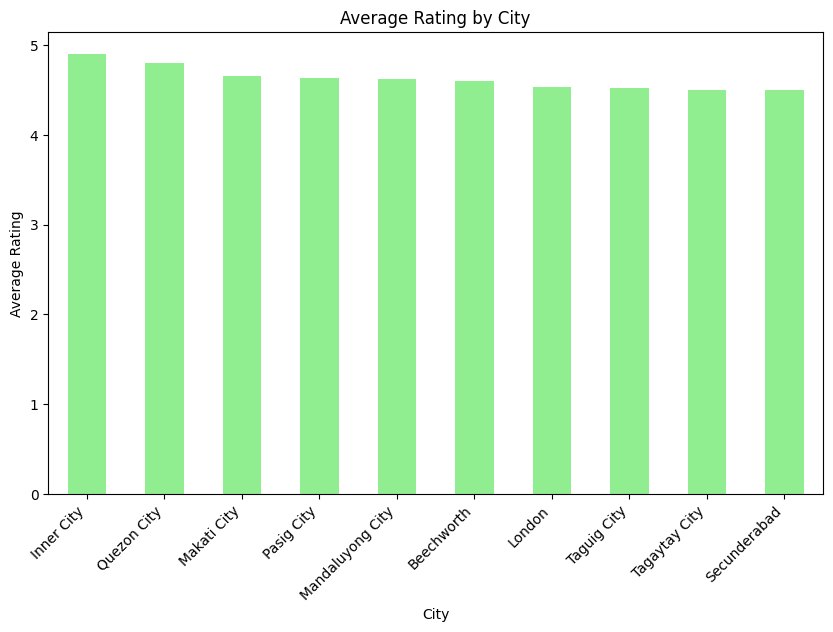

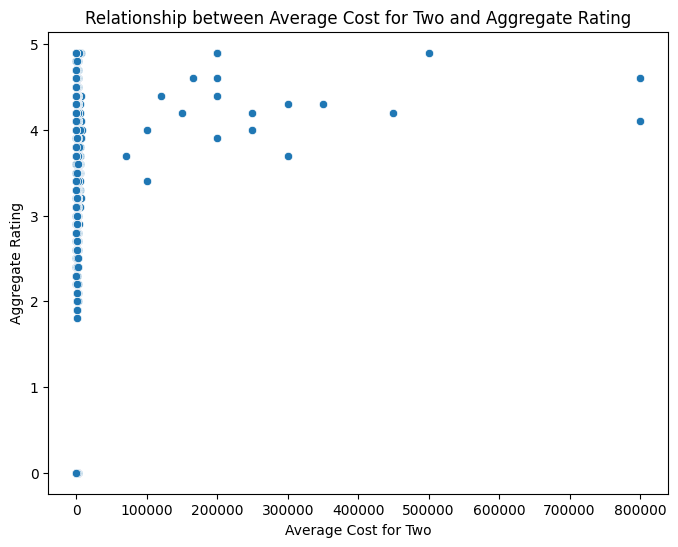

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Dataset .csv')

plt.figure(figsize=(8, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

average_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
average_rating_by_cuisine.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

average_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
average_rating_by_city.plot(kind='bar', color='lightgreen')
plt.title('Average Rating by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df)
plt.title('Relationship between Average Cost for Two and Aggregate Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.show()
